In [127]:
from PIL import Image, ImageFont, ImageDraw
%matplotlib inline
from zheye import util
from random import randint
import numpy as np

In [138]:
sample_size = 100

In [139]:
X = []
Y = []

for i in range(sample_size):
    direction = np.random.binomial(1, 0.5)
    if direction == 0:
        direction = -1
    ret = util.RandomGenerateOneChar(y=direction)

    X.append(np.asarray(ret.convert('L')))
    
    if direction == 1:
        Y.append([1,0])
    else:
        Y.append([0,1])

X = np.array(X)
Y = np.array(Y)

[0 1]


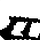

In [140]:
print Y[0]
Image.fromarray(X[0])

In [141]:
Y.shape

(100, 2)

# 标准化是依照特征矩阵的列处理数据

In [142]:
mean = (X.sum(axis=0) /sample_size).astype("uint8")

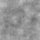

In [143]:
Image.fromarray(mean)

In [144]:
X = (X.astype("float64") - mean)/256

In [145]:
X = np.expand_dims(X, axis=3)
X.shape

(100, 40, 40, 1)

# 存储

In [146]:
np.save('testing_X', X)
np.save('testing_Y', Y)

In [137]:
np.save('train_X', X)
np.save('train_Y', Y)

In [ ]:
X = np.squeeze(testing_X, axis=(3,))

X = X.astype(bool)

X = np.squeeze(X, axis=(3))

plt.ion()
for i in range(7):
    x = k_means_cluster_centers[i][0]
    y = k_means_cluster_centers[i][1]
    
    cr = util.crop(im, x, y, radius=20)
    X = np.asarray(cr.convert('1'), dtype='float')
    
    xx = X.astype('uint8')*255
    mm = Image.fromarray(xx)
    
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    
    m_y = model.predict(x1)
    print(m_y[0][0])